In [1]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [2]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs,
                        dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1]*features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()),
                        dtype=torch.float32)

In [3]:
print(features[0], labels[0])

tensor([-1.5891,  0.1555]) tensor(0.4953)


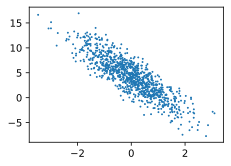

In [4]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size,  num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.2483,  1.0523],
        [ 1.9632, -0.7129],
        [ 0.0730,  0.8537],
        [-1.0461,  1.6511],
        [-0.3002,  0.4968],
        [-0.6633, -0.1484],
        [-0.8560,  0.2559],
        [-0.3731, -0.0690],
        [ 0.9578,  0.5029],
        [ 0.7232, -0.1738]]) tensor([ 0.1112, 10.5459,  1.4390, -3.4969,  1.9283,  3.3805,  1.6169,  3.6807,
         4.4002,  6.2552])


In [10]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True)

tensor([0.], requires_grad=True)

In [11]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

In [12]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [13]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

In [16]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loass %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loass 0.000114
epoch 2, loass 0.000048
epoch 3, loass 0.000048


In [17]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0004],
        [-3.3995]], requires_grad=True)
4.2 
 tensor([4.1995], requires_grad=True)
